
# Discussion Related With Outliers And Impact On Machine Learning!!


## Which Machine Learning Models Are Sensitive To Outliers?

Naivye Bayes Classifier--- Not Sensitive To Outliers

SVM-------- Not Sensitive To Outliers

Linear Regression---------- Sensitive To Outliers

Logistic Regression------- Sensitive To Outliers

Decision Tree Regressor or Classifier---- Not Sensitive

Ensemble(RF,XGboost,GB)------- Not Sensitive

KNN--------------------------- Not Sensitive

Kmeans------------------------ Sensitive

Hierarichal------------------- Sensitive

PCA-------------------------- Sensitive

Neural Networks-------------- Sensitive

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

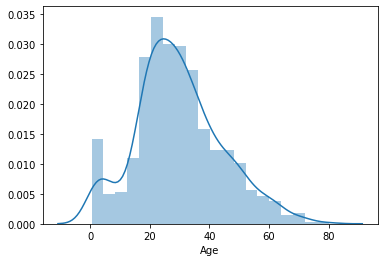

In [5]:
sns.distplot(df['Age'])

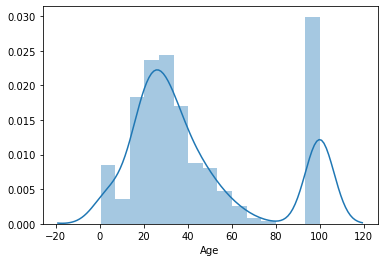

In [6]:
sns.distplot(df['Age'].fillna(100))

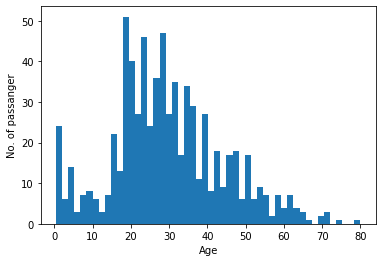

In [9]:
plt.hist(df['Age'],bins=50)
plt.xlabel('Age')
plt.ylabel('No. of passanger')
plt.show()

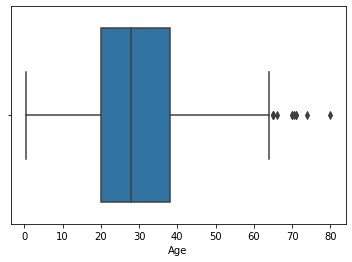

In [10]:
sns.boxplot(df['Age'])

In [12]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

###### If The Data Is Normally Distributed We use this

In [13]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()

print(lower_boundary), 
print(uppper_boundary),
print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882



##### If Features Are Skewed We Use the below Technique

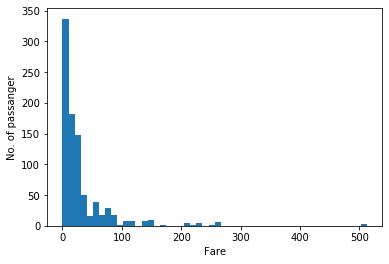

In [20]:
plt.hist(df['Fare'],bins=50)
plt.xlabel('Fare')
plt.ylabel('No. of passanger')
plt.show()

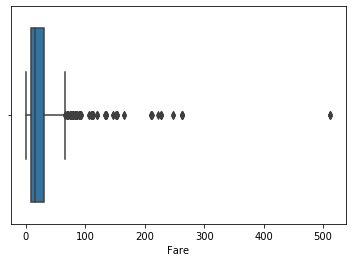

In [21]:
sns.boxplot(df['Fare'])

In [22]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [25]:
### lets compute the interquantile range to calculate the boundaries

IQR = df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)

IQR

23.0896

In [26]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*1.5)

print(upper_bridge)
print(lower_bridge)

65.6344
-26.724


In [28]:
### Extreme Outlier

lower_bridge = df['Fare'].quantile(0.25) - (IQR*3)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*3)

print(upper_bridge)
print(lower_bridge)

100.2688
-61.358399999999996


#### Training model

In [30]:
data = df.copy()

In [31]:
data.loc[data['Age']>=75,'Age'] = 75

In [32]:
data.loc[data['Fare']>=100,'Fare'] = 100

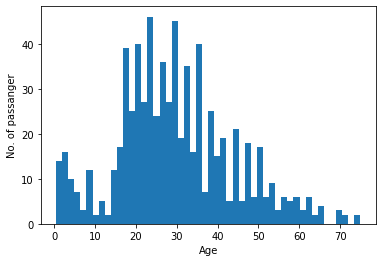

In [38]:
plt.hist(data['Age'],bins=50)
plt.xlabel('Age')
plt.ylabel('No. of passanger')
plt.show()

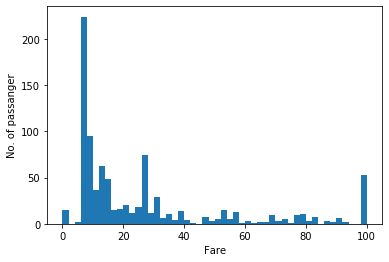

In [39]:
plt.hist(data['Fare'],bins=50)
plt.xlabel('Fare')
plt.ylabel('No. of passanger')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [41]:
### Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6791044776119403
roc_auc_score: 0.6802591463414633


In [42]:
### Random Forest

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6716417910447762
roc_auc_score: 0.7013660881801126
